# Evaluation

this notebook contains all graphs included in the evaluation part of the thesis.

In [1]:
import sys
sys.path.insert(0, './../')
# used to avoid pickle module not found error. 
sys.path.insert(0, './../src/')

In [2]:
%load_ext autoreload
%autoreload 1

%aimport src.preprocessing
%aimport src.estimators
%aimport src.visualization

In [3]:
from src.preprocessing import TraceStats, BatchStats
from src.estimators import AE, GEE, UJ2A, SGD, PA, RLS
from src.visualization import plot_card, plot_sampling, plot_ml, plot_features, plot_tradeoff
from src.visualization import df_to_pdf, plot_sampling_paper, plot_ml_paper
from src.visualization import plot_delayed_batches, plot_tradeoff_new
from itertools import product
from scipy.stats import linregress
import pandas as pd
from functools import partial
from cycler import cycler
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# trace parameters used to create runs

runs = {}
traces = ['caida-2016', 'ucla-csd', 'caida-ddos', 'darpa-ddos']

runs['caida-2016'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02, 0.1],
                      'partitions': ['50K', '100K', '150K'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

runs['ucla-csd'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02, 0.1],
                      'partitions': ['50K', '100K', '150K'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

runs['caida-ddos'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02],
                      'partitions': ['1S', '2S', '3S'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

runs['darpa-ddos'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02, 0.1],
                      'partitions': ['1S', '2S', '3S'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

## CAIDA-2016

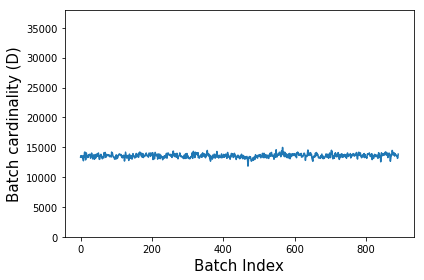

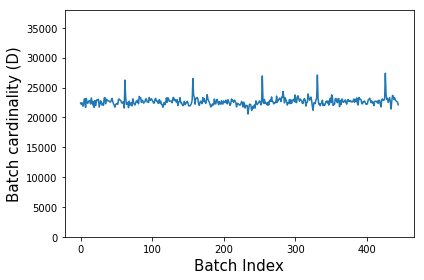

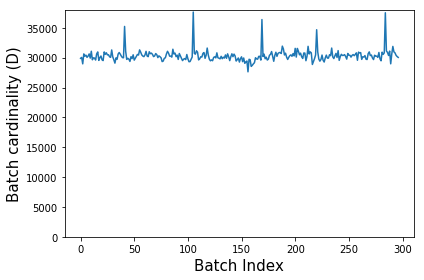

In [5]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'caida-2016'
# choose random sampling rate(has no effect over this graph)
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = (0, 38000)

plot_card(trace, sampling_rate, partitions, ylim)

<BarContainer object of 875 artists>

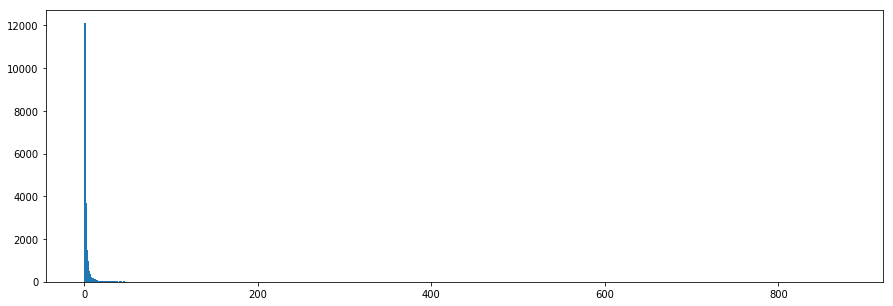

In [6]:
bs = BatchStats.from_pcap('./../raw_data/file_00000_20160317145911.pcap', sampling_rate=1)

m = max(bs.histogram)
fig ,axes = plt.subplots(1,1, figsize=(15,5))

axes.bar(range(1,m+1), [bs.histogram[i] for i in range(1, m+1)], 3)

In [7]:
total_flows = sum(bs.histogram[i] for i in range(1,m+1))

# total_packets = sum(i*bs.histogram[i] for i in range(1,m+1))
total_packets = 100000

n = 3
percent_of_flows_under = sum([bs.histogram[i] for i in range(1, 4)])/total_flows * 100
percent_of_packets_over = sum([i*bs.histogram[i] for i in range(20, m)])/total_packets * 100

print(percent_of_flows_under, percent_of_packets_over)

81.12862369828314 51.615


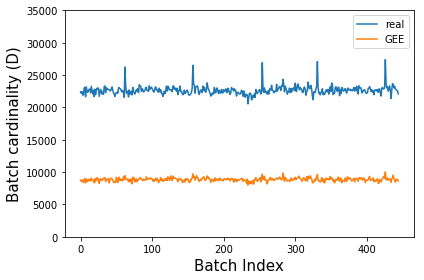

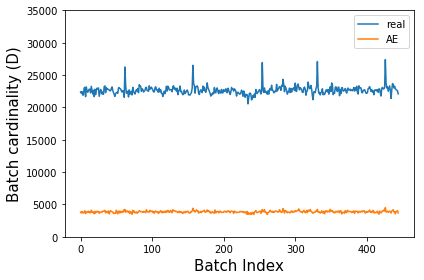

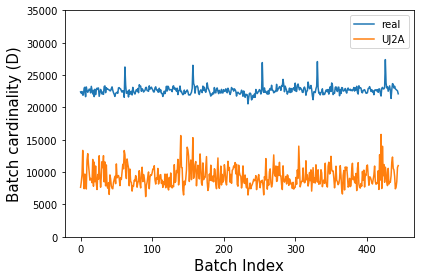

In [8]:
# show the performance of traditional algorithms. 150K, same graph

trace = 'caida-2016'
# sampling_rates = runs[trace]['sampling_rates']
sampling_rate = 0.0198
partition = '100K'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
ylim = (0, 35000)

df_stat = plot_sampling(trace, sampling_rate, partition, models, model_names, ylim)

,RMSE,MAE,MAPE,MAXAE
GEE,13803.032591,13793.587778,60.898845,17441.741718
UJ2A,13449.641100,13347.027071,58.902207,18629.615531
AE,18788.958196,18780.169235,82.923900,22878.719943


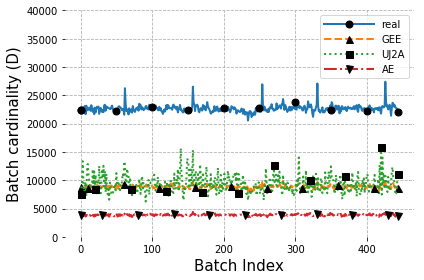

In [9]:
# one graph for paper

# show the performance of traditional algorithms. 150K, same graph

trace = 'caida-2016'
# sampling_rates = runs[trace]['sampling_rates']
sampling_rate = 0.0198
partition = '100K'
features = ['f_1']
models = [GEE, UJ2A, AE]
model_names = ['GEE', 'UJ2A', 'AE']
ylim = (0, 40000)

plot_sampling_paper(trace, sampling_rate, partition, models, model_names, ylim)

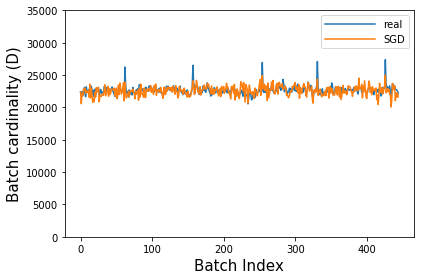

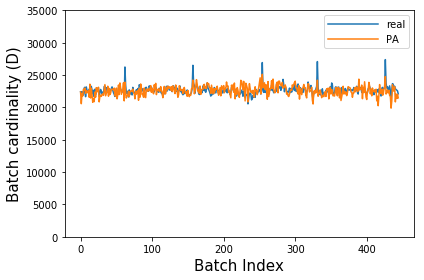

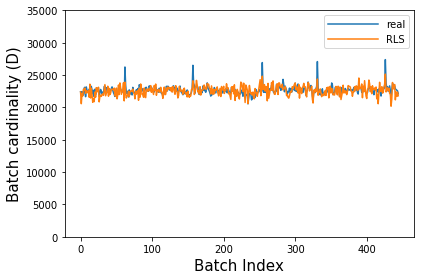

In [10]:
# compare online ML algs.

trace = 'caida-2016'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

features = ['f_1']
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = (0, 35000)

df_ml = plot_ml(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim)

,RMSE,MAE,MAPE,MAXAE
SGD,690.533503,533.958478,2.345432,2724.480300
PA,732.595361,569.667493,2.503739,2873.461712
RLS,680.217023,527.289684,2.316074,2699.041520


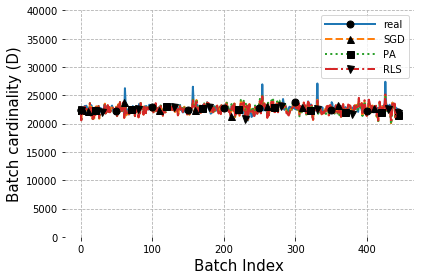

In [11]:
# compare online ML algs. # one graph for paper

trace = 'caida-2016'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

features = ['f_1']
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = (0, 40000)

plot_ml_paper(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim)

In [12]:
trace = 'caida-2016'
df = df_stat.append(df_ml)
df = df.round(1)
df.index.name = 'Estimator'
df_to_pdf(df_stat.append(df_ml), trace + '_error',
          comma_separated_columns=['RMSE', 'MAE', 'MAPE', 'MAXAE'], gen_latex=True)
df

,RMSE,MAE,MAPE,MAXAE
Estimator,,,,
GEE,13803.0,13793.6,60.9,17441.7
AE,18789.0,18780.2,82.9,22878.7
UJ2A,13449.6,13347.0,58.9,18629.6
SGD,690.5,534.0,2.3,2724.5
PA,732.6,569.7,2.5,2873.5
RLS,680.2,527.3,2.3,2699.0


,"('f_1',)","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'avg_pkt_len')","('f_1', 'f_2', 'f_3', 'syn_count')"
SGD,2.345432,2.312422,2.871667,2.310743
PA,2.503739,2.501453,2.769087,2.497068
RLS,2.316074,2.275189,2.525878,2.274112


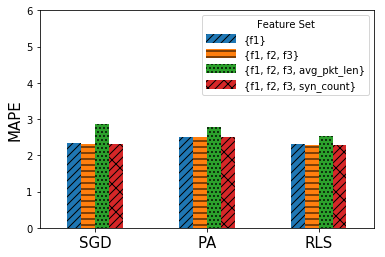

In [13]:
# different feature sets


trace = 'caida-2016'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

feature_sets = [('f_1',), ('f_1', 'f_2', 'f_3'), ('f_1', 'f_2', 'f_3', 'avg_pkt_len'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]

models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_features(trace, sampling_rate, training_rate, partition, feature_sets,
              models, model_names,legend='inside', ylim=(0,6))

,0.005,0.01,0.015
50K,4.974282,3.883022,2.829301
100K,4.373272,3.100182,2.390918
150K,3.475775,3.086241,1.834685


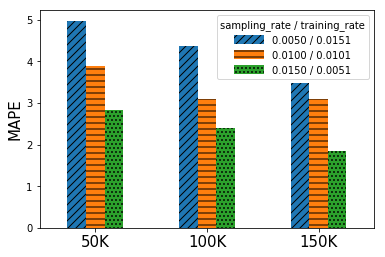

In [14]:
# training rate - sampling rate tradeoff


trace = 'caida-2016'
effective_sampling_rate = 0.02
sampling_rates = [0.005, 0.01, 0.015]
partitions = ['50K', '100K', '150K']
features = ['f_1']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name, legend='inside')



# CAIDA-DDOS

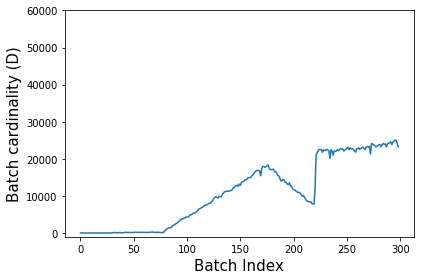

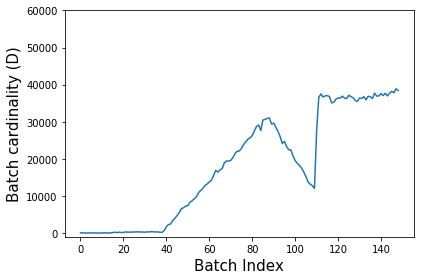

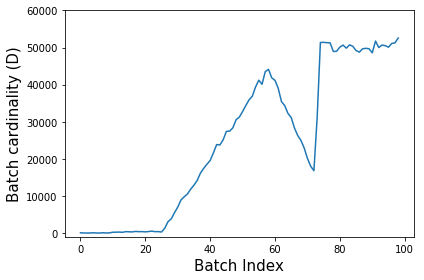

In [15]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'caida-ddos'
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = (-1000, 60000)

plot_card(trace, sampling_rate, partitions, ylim)

### no attack batch

In [16]:
# plot 1st 100K batch frequency of frequencies

bs = BatchStats.from_pcap('./../raw_data/ddos_1_sec_00020_20070805001456.pcap', sampling_rate=1)

In [17]:
bs.batch_size

400

### attack batch

In [18]:
# plot 1st 100K batch frequency of frequencies

bs = BatchStats.from_pcap('./../raw_data/ddos_1_sec_00299_20070805001935.pcap', sampling_rate=1)

In [19]:
bs.batch_size

172337

<BarContainer object of 129 artists>

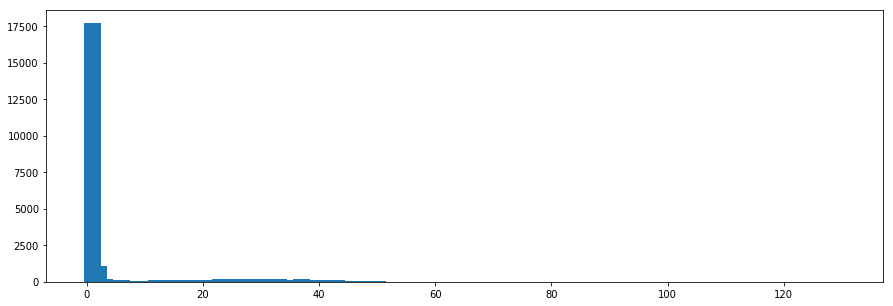

In [20]:
m = max(bs.histogram)
fig ,axes = plt.subplots(1,1, figsize=(15,5))

axes.bar(range(1,m+1), [bs.histogram[i] for i in range(1, m+1)], 3)

In [21]:
# heavy tailed parameters

total_flows = sum(bs.histogram[i] for i in range(1,m+1))

# total_packets = sum(i*bs.histogram[i] for i in range(1,m+1))
total_packets = bs.batch_size

n = 10
percent_of_flows_under = sum([bs.histogram[i] for i in range(1, 10)])/total_flows * 100
percent_of_packets_over = sum([i*bs.histogram[i] for i in range(11, m)])/total_packets * 100

print(percent_of_flows_under, percent_of_packets_over)

79.5447141228213 85.62177593900323


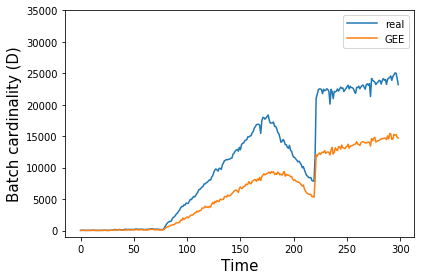

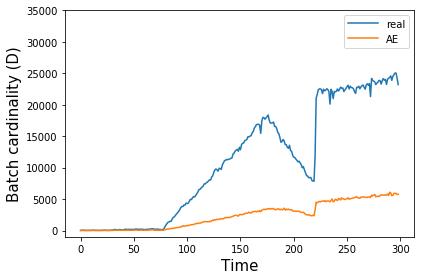

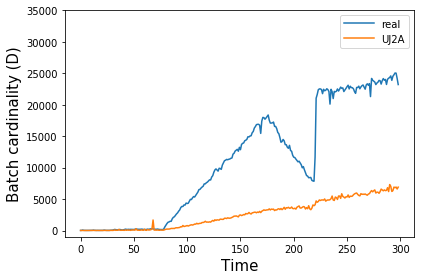

In [22]:
# show the performance of traditional algorithms. 1S
trace = 'caida-ddos'
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0198
ylim = (-1000, 35000)

df_stat = plot_sampling(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

,RMSE,MAE,MAPE,MAXAE
GEE,5976.916610,4667.704493,41.830295,10422.828580
AE,11003.984001,8539.600587,75.074777,19141.262761
UJ2A,10774.432404,8362.333841,73.789654,18240.523871


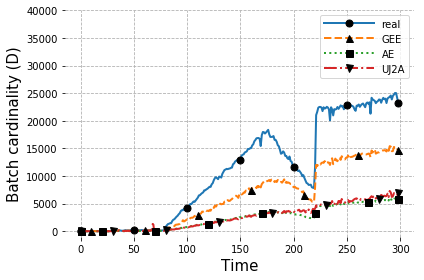

In [23]:
# show the performance of traditional algorithms. 1S
trace = 'caida-ddos'
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0198
ylim = (-1000, 40000)

plot_sampling_paper(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

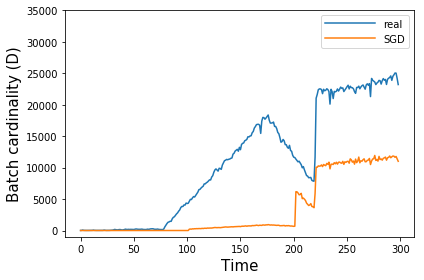

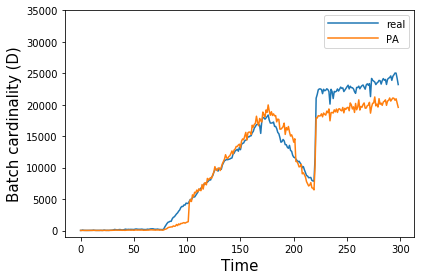

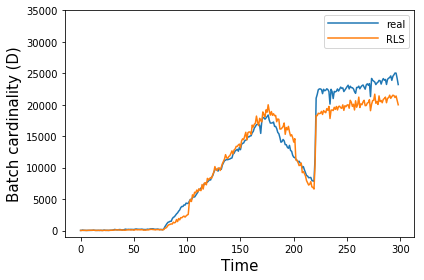

In [24]:
# compare online ML algs.

trace = 'caida-ddos'
sampling_rate = 0.01
training_rate = 0.01
partition = '1S'
features = ['f_1']
ylim = (-1000, 35000)
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

df_ml = plot_ml(trace, sampling_rate, training_rate, partition,
                    features, models, model_names, ylim, xlabel='Time')

,RMSE,MAE,MAPE,MAXAE
PA,1966.567181,1384.084423,25.865460,4531.147129
RLS,1732.317138,1212.363517,21.689769,4119.711594
SGD,9437.365988,7538.718700,82.572160,17427.552367


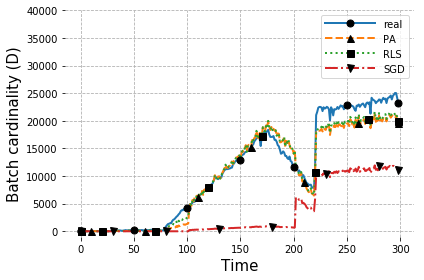

In [25]:
# compare online ML algs.

trace = 'caida-ddos'
sampling_rate = 0.01
training_rate = 0.01
partition = '1S'
features = ['f_1']
ylim = (-1000, 40000)
models = [PA, RLS, SGD]
model_names = ['PA', 'RLS', 'SGD']

plot_ml_paper(trace, sampling_rate, training_rate, partition,
              features, models, model_names, ylim, xlabel='Time')

In [26]:
trace = 'caida-ddos'
df = df_stat.append(df_ml)
df = df.round(1)
df.index.name = 'Estimator'
df_to_pdf(df_stat.append(df_ml), trace + '_error',
          comma_separated_columns=['RMSE', 'MAE', 'MAPE', 'MAXAE'], gen_latex=True)
df

,RMSE,MAE,MAPE,MAXAE
Estimator,,,,
GEE,5976.9,4667.7,41.8,10422.8
AE,11004.0,8539.6,75.1,19141.3
UJ2A,10774.4,8362.3,73.8,18240.5
SGD,9437.4,7538.7,82.6,17427.6
PA,1966.6,1384.1,25.9,4531.1
RLS,1732.3,1212.4,21.7,4119.7


,"('f_1',)","('f_1', 'sample_size')","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'avg_pkt_len')","('f_1', 'f_2', 'f_3', 'syn_count')"
SGD,82.572160,66.174490,82.153736,68.997650,81.928981
PA,25.865460,23.140688,26.188022,26.720158,26.129138
RLS,21.689769,22.731648,23.607416,28.598912,23.568228


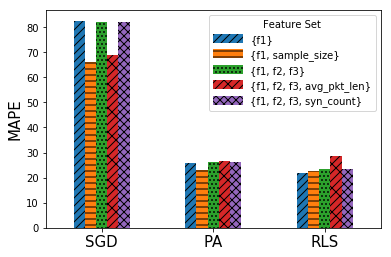

In [27]:
### different feature sets

trace = 'caida-ddos'
sampling_rate = 0.01
training_rate = 0.01
partition = '1S'
feature_sets = [('f_1',), ('f_1', 'sample_size'), ('f_1', 'f_2', 'f_3'), ('f_1', 'f_2', 'f_3', 'avg_pkt_len'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names, legend='inside')

,0.005,0.01,0.015
1S,20.742917,24.777754,39.610731
2S,29.249573,40.038721,60.096500
3S,27.306163,30.460569,33.115894


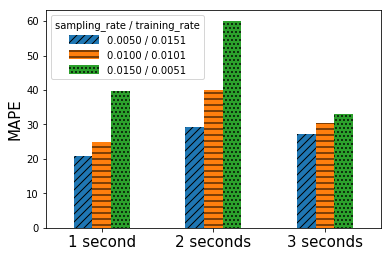

In [28]:
# training rate - sampling rate tradeoff

trace = 'caida-ddos'
effective_sampling_rate = 0.02
sampling_rates = [0.005, 0.01, 0.015]
partitions = ['1S', '2S', '3S']
features = ['f_1','sample_size']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name, legend='inside')

# DARPA-DDOS

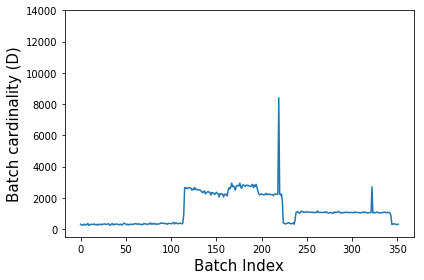

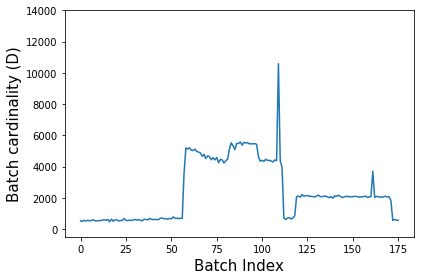

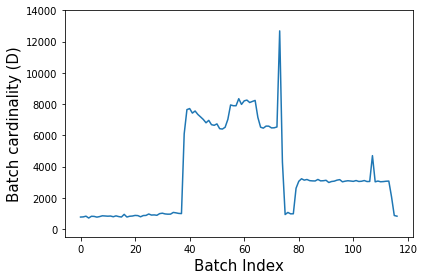

In [29]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'darpa-ddos'
# choose random sampling rate(has no effect over this graph)
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = ((-500, 14000))
plot_card(trace, sampling_rate, partitions, ylim)

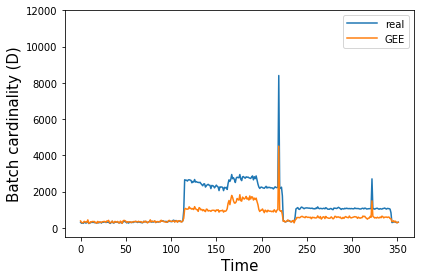

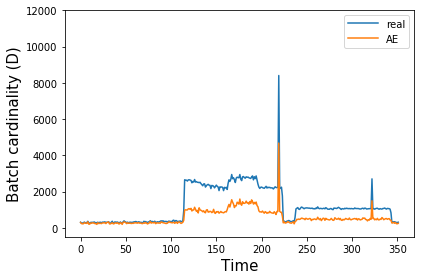

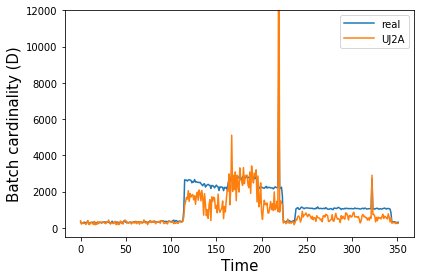

In [30]:
# show the performance of traditional algorithms. 

trace = 'darpa-ddos'
# sampling_rates = runs[trace]['sampling_rates']
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0975
ylim = ((-500, 12000))

df_stat = plot_sampling(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

,RMSE,MAE,MAPE,MAXAE
GEE,800.882937,569.625825,33.772265,3898.134721
AE,873.440949,644.974913,41.416756,3729.808807
UJ2A,829.440495,451.967573,31.187520,10826.318374


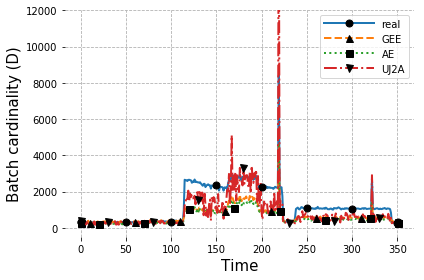

In [31]:
# show the performance of traditional algorithms. 1S
trace = 'darpa-ddos'
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0975
ylim = (-500, 12000)

plot_sampling_paper(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

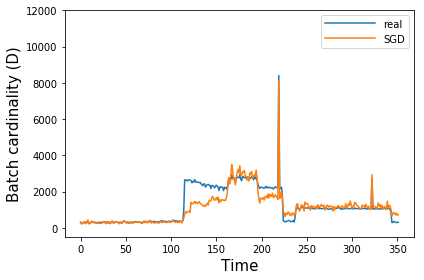

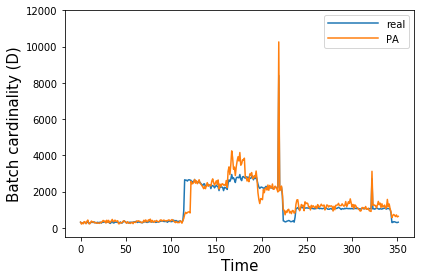

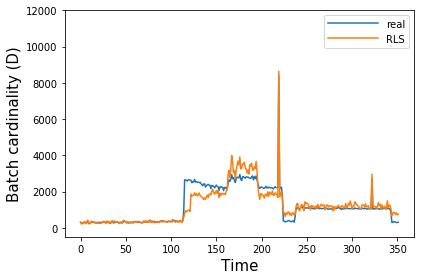

In [32]:
# compare online ML algs.

trace = 'darpa-ddos'
sampling_rate = 0.051
training_rate = 0.05
partition = '1S'
features = ['f_1']
models = [partial(SGD, learning_rate=10**-5), PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = ((-500, 12000))

df_ml = plot_ml(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim, xlabel='Time')

,RMSE,MAE,MAPE,MAXAE
PA,394.952694,215.275612,21.925805,1925.424857
RLS,404.216323,256.015016,21.997040,1848.839292
SGD,828.871068,573.386136,34.232878,3862.485779


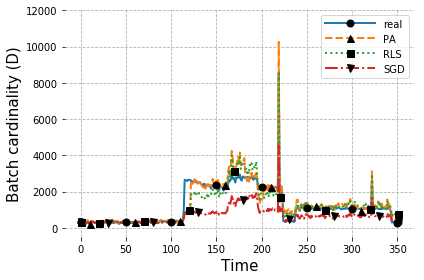

In [33]:
# compare online ML algs.

trace = 'darpa-ddos'
sampling_rate = 0.051
training_rate = 0.05
partition = '1S'
features = ['f_1']
ylim = (-500, 12000)
models = [PA, RLS, SGD]
model_names = ['PA', 'RLS', 'SGD']

plot_ml_paper(trace, sampling_rate, training_rate, partition,
              features, models, model_names, ylim, xlabel='Time')

In [34]:
trace = 'darpa-ddos'
df = df_stat.append(df_ml)
df = df.round(1)
df.index.name = 'Estimator'
df_to_pdf(df_stat.append(df_ml), trace + '_error',
          comma_separated_columns=['RMSE', 'MAE', 'MAPE', 'MAXAE'], gen_latex=True)
df

,RMSE,MAE,MAPE,MAXAE
Estimator,,,,
GEE,800.9,569.6,33.8,3898.1
AE,873.4,645.0,41.4,3729.8
UJ2A,829.4,452.0,31.2,10826.3
SGD,458.6,274.2,22.7,1899.6
PA,395.0,215.3,21.9,1925.4
RLS,404.2,256.0,22.0,1848.8


,"('f_1',)","('f_1', 'sample_size')","('f_1', 'syn_count')","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'avg_pkt_len')","('f_1', 'f_2', 'f_3', 'syn_count')"
PA,21.925805,52.588425,18.537923,21.266770,46.238823,17.893068
RLS,21.997040,44.202259,18.395820,22.958765,48.601206,19.068311


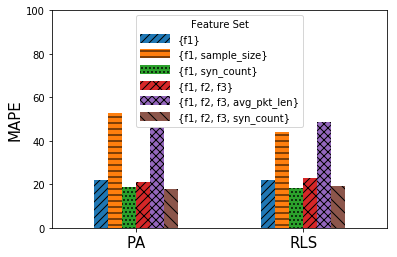

In [35]:
### different feature sets

trace = 'darpa-ddos'
sampling_rate = 0.051
training_rate = 0.05
partition = '1S'

feature_sets = [('f_1',), ('f_1', 'sample_size'), ('f_1', 'syn_count'),
                ('f_1', 'f_2', 'f_3'),
                ('f_1', 'f_2', 'f_3', 'avg_pkt_len'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]

models = [PA, RLS] # partial(SGD, learning_rate=10**-5),
model_names = ['PA', 'RLS'] # 'SGD', 

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names, legend='inside', ylim=(0,100))

,0.005,0.01,0.015
1S,20.886542,18.849224,14.849558
2S,16.740905,16.069246,14.277972
3S,19.013130,18.306025,16.750033


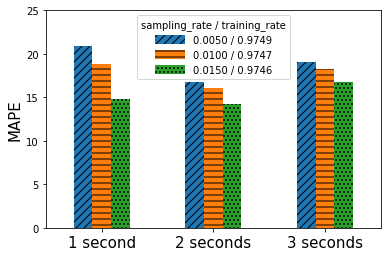

In [36]:
# training rate - sampling rate tradeoff

trace = 'darpa-ddos'
effective_sampling_rate = 0.975
sampling_rates = [0.005, 0.01, 0.015]
partitions = ['1S', '2S', '3S']
features = ['f_1']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name, legend='inside', ylim=(0,25))

# UCLA-CSD

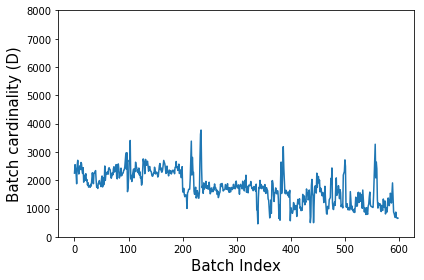

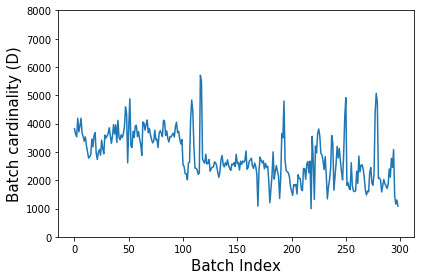

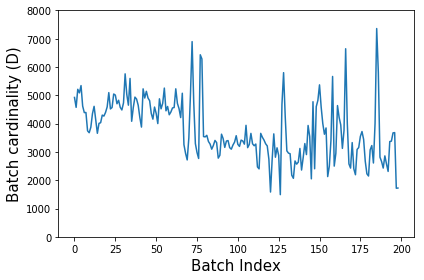

In [37]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'ucla-csd'
# choose random sampling rate(has no effect over this graph)
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = (0,8000)

plot_card(trace, sampling_rate, partitions, ylim)

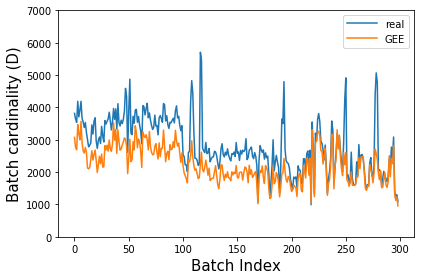

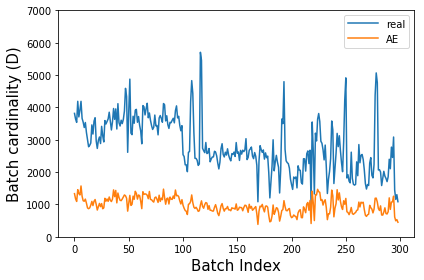

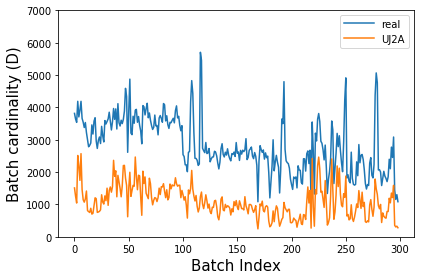

In [38]:
# show the performance of traditional algorithms. 150K, same graph

trace = 'ucla-csd'
# sampling_rates = runs[trace]['sampling_rates']
sampling_rate = 0.0198
partition = '100K'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
ylim = (0, 7000)

df_stat = plot_sampling(trace, sampling_rate, partition, models, model_names, ylim)

,RMSE,MAE,MAPE,MAXAE
GEE,763.731370,600.241830,19.220403,3458.126647
AE,1977.409825,1863.592166,64.717655,4720.718390
UJ2A,1823.958048,1735.651470,61.940853,4460.156139


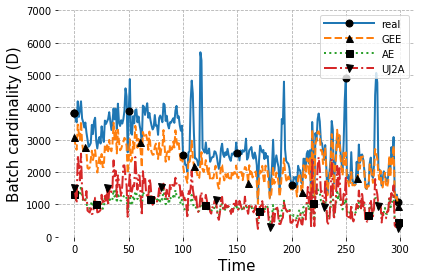

In [39]:
# show the performance of traditional algorithms. UCLA-CSD
trace = 'ucla-csd'
partition = '100K'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0198
ylim = (0, 7000)

plot_sampling_paper(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

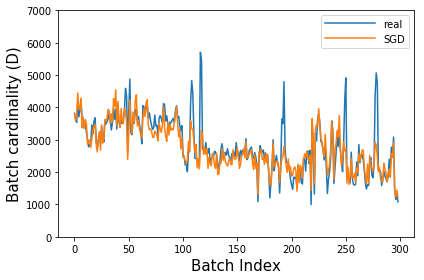

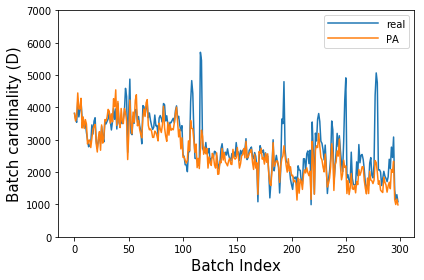

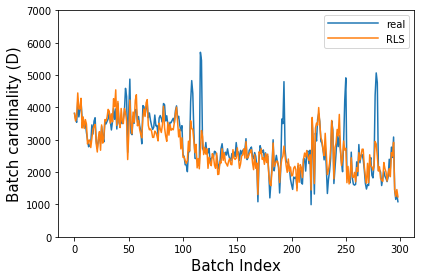

In [40]:
# compare online ML algs.

trace = 'ucla-csd'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

features = ['f_1']
models = [partial(SGD, learning_rate=10**-5), PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = (0, 7000)

df_ml = plot_ml(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim)

,RMSE,MAE,MAPE,MAXAE
PA,532.372519,328.839905,11.229210,2987.608793
RLS,459.553554,274.477088,9.488669,2996.883586
SGD,462.549590,285.165190,10.049032,3000.478851


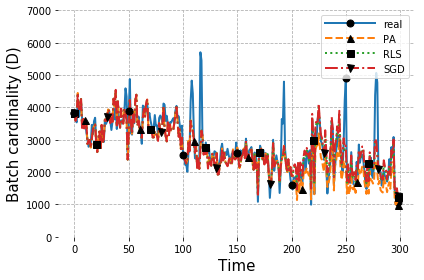

In [41]:
# compare online ML algs. paper version. UCLA-CSD

trace = 'ucla-csd'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'
features = ['f_1']

ylim = (0, 7000)
models = [PA, RLS, SGD]
model_names = ['PA', 'RLS', 'SGD']

plot_ml_paper(trace, sampling_rate, training_rate, partition,
              features, models, model_names, ylim, xlabel='Time')

In [42]:
trace = 'ucla-csd'
df = df_stat.append(df_ml)
df = df.round(1)
df.index.name = 'Estimator'
df_to_pdf(df_stat.append(df_ml), trace + '_error',
          comma_separated_columns=['RMSE', 'MAE', 'MAPE', 'MAXAE'], gen_latex=True)
df

,RMSE,MAE,MAPE,MAXAE
Estimator,,,,
GEE,763.7,600.2,19.2,3458.1
AE,1977.4,1863.6,64.7,4720.7
UJ2A,1824.0,1735.7,61.9,4460.2
SGD,459.5,271.9,9.3,2996.5
PA,532.4,328.8,11.2,2987.6
RLS,459.6,274.5,9.5,2996.9


,"('f_1',)","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'syn_count')"
SGD,9.342545,8.836949,8.759325
PA,11.229210,10.496349,10.377290
RLS,9.488669,8.990253,8.929345


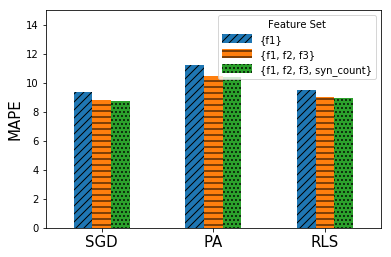

In [43]:
### different feature sets

trace = 'ucla-csd'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'
feature_sets = [('f_1',), ('f_1', 'f_2', 'f_3'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]
models = [ partial(SGD, learning_rate=10**-5), PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names, legend='inside', ylim=(0,15))

,0.005,0.01,0.015
50K,21.161327,26.854669,25.936594
100K,24.192650,24.645948,30.047530
150K,17.777541,23.591410,40.906596


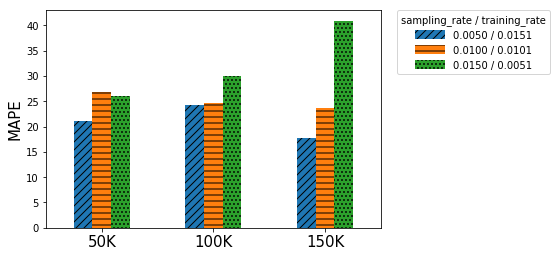

In [44]:
# training rate - sampling rate tradeoff

trace = 'ucla-csd'
effective_sampling_rate = 0.02
sampling_rates = [0.005, 0.01, 0.015]
partitions =  runs[trace]['partitions']
features = ['f_1','sample_size']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name)

## TON Corrections

### Delayed batches

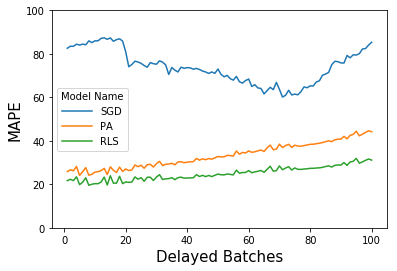

In [45]:
trace = 'caida-ddos'
sampling_rate = 0.01
training_rate = 0.01
partition = '1S'
features = ['f_1']
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_delayed_batches(trace, sampling_rate, training_rate, partition,
                     features, models, model_names, 1, 100, ylim=(0,100), savefig=True);

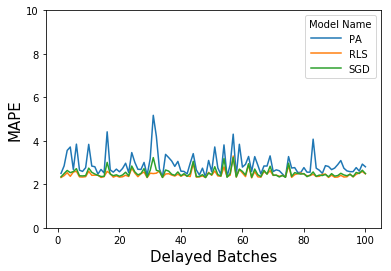

In [46]:
trace = 'caida-2016'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'
features = ['f_1']
models = [PA, RLS, SGD]
model_names = ['PA', 'RLS', 'SGD']

plot_delayed_batches(trace, sampling_rate, training_rate, partition,
                     features, models, model_names, 1, 100, ylim=(0,10), savefig=True);

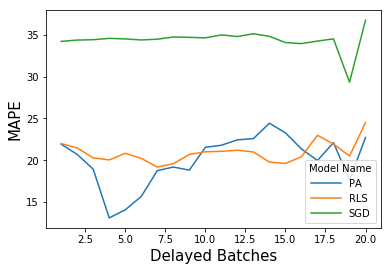

In [47]:
trace = 'darpa-ddos'
sampling_rate = 0.051
training_rate = 0.05
partition = '1S'
features = ['f_1']
models = [PA, RLS, SGD]
model_names = ['PA', 'RLS', 'SGD']

plot_delayed_batches(trace, sampling_rate, training_rate, partition, features, models, model_names, 1, int(1/training_rate));

### Sampling Training Tradeoff

,0.001,0.003,0.005,0.007,0.009000000000000001,0.011,0.013000000000000001
50K,3.957712,4.900320,4.974282,3.775893,4.401877,4.114993,3.133719
100K,6.088067,3.790995,4.373272,3.680502,3.252299,2.473088,2.706153
150K,7.346366,3.593894,3.475775,2.573268,3.308134,2.768769,2.008071


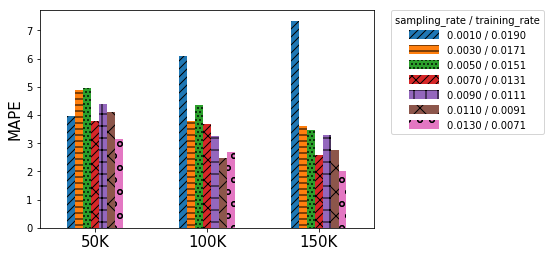

In [48]:
# training rate - sampling rate tradeoff

trace = 'caida-2016'
effective_sampling_rate = 0.02
sampling_rates = np.arange(0.001, 0.015, 0.002)
partitions = ['50K', '100K', '150K']
features = ['f_1']
model = PA
model_name='PA'

plot_tradeoff_new(trace, effective_sampling_rate, sampling_rates, partitions,
                  features, model, model_name, legend='outside', savefig=True)

,0.001,0.003,0.005,0.007,0.009000000000000001,0.011,0.013000000000000001
1S,16.856362,26.856753,20.742917,24.441271,23.690028,29.586889,33.679732
2S,31.945756,27.734697,29.249573,34.901368,38.912199,44.363889,58.240803
3S,41.417809,27.928573,27.306163,28.219994,29.258394,33.488221,33.190106


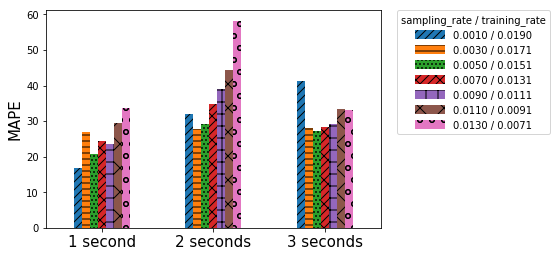

In [49]:
# training rate - sampling rate tradeoff

trace = 'caida-ddos'
effective_sampling_rate = 0.02
sampling_rates = np.arange(0.001, 0.015, 0.002)
partitions = ['1S', '2S', '3S']
features = ['f_1','sample_size']
model = PA
model_name='PA'

plot_tradeoff_new(trace, effective_sampling_rate, sampling_rates, partitions,
              features, model, model_name, legend='outside', savefig=True)